# QHM5703 Mini-Project submission


## What is the problem?

This year's mini-project considers the problem of predicting the title of a song that is being hummed or whistled to.

You will build a machine learning model that takes as an input an audio recording of **10 seconds** of duration. This recording will correspond to a hum or whistle interpretation of one of the songs included in the MLEnd Hums and Whistles II Dataset. The output of the model will be the song label.


## Which dataset will I use?

We have created two subsets of the Hums and Whistles II Dataset. The first one has 400 samples (\~1 GB). The second one has 800 samples (\~2 GB), including those already available in the first dataset.

You can download them from:

https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip

and

https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_800.zip


## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission.

Please save your notebook as:

* QHM5703_miniproject_2526.ipynb


## How will my submission be evaluated?

**This submission is worth 20 marks. We will value**:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have a good understanding, you will be using the right methodology, selecting the right approaches and assessing correctly the quality of your solutions, acknowledge where appropriate that despite your attempts your solutions might not good enough, and always critically reflect on your work to suggest what you could have done differently.

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**.

## Show the world what you can do

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**. 


### Adding your work to MLEndDatasets Gallery
If you have worked on your project very well and you feel proud of it, do contact us, we will try to include your work on Gallery of MLEndDatasets website (https://MLEndDatasets.github.io). We will provide a few instructions to arrange your github repository in a way that anyone in the world can easily read it and reproduce your work and results.





-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

# [Your title goes here]

# 1 Author

**Student Name**:  Wenjie Wang
**Student ID**:  231237055



# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it.

## 2.1 Description：

* The aim of the project is pretecting names from hum or whistle audio. I need to build a machine learning model that takes a audio as input and outputs the song's name.

## 2.2 Explanation：
* First of all, music is interesting to me, and I often watch programs where you have to guess the name of a song based on audio. However, the difficulty of this project for me is how to identify them. These audios have no instrumental accompaniment and no lyrics, so their characteristics are not very clear. At the same time, because of different people's performances, pitch and tempo vary, which makes some songs seem very different.

# 3 Methodology

Describe your methodology. Specifically, describe your training task and validation task, and how model performance is defined (i.e. accuracy, confusion matrix, etc). Any other tasks that might help you build your model should also be described here.

## 3.1 Training Task：
This is a multi-class classification task:
* Input: features extracted from 10-second audio.
* Output: songs' names

## 3.2 Validation Task：
In order to better separate and extract features, I chose：
* 80% of the dataset as the training set and the remaining 20% as the test set.
* Use random_state to ensure reproducibility

## 3.3 Performance Metrics：
We evaluate model performance using four complementary metrics:
* Accuracy: The proportion correctly estimated
* Confusion Matrix: To visualize core feature between songs 
* Feature Importance: To identify the most important features for prediction

# 4 Implemented ML prediction pipelines

Describe the ML prediction pipelines that you will explore. Clearly identify their input and output, stages and format of the intermediate data structures moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. After providing an overview, describe in more detail each one of the stages that you have included in their corresponding subsections (i.e. 4.1 Transformation stage, 4.2 Model stage, 4.3 Ensemble stage).

## 4.1 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

* The workflow is divided into several stages:
Input the audios - extract the features - train the model -  Evaluation - Output the name

* Since I don't know how to use Markdown to create diagrams, I sought help from AI. All giagrams are completed by AI.

### 4.1.1 Feature Extraction Stage
The aim of step is to convert signals into low-dimensional features
| Feature Category | Feature Name               | Description                                                                 | Implementation                                                                |
|------------------|----------------------------|-----------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------|
| Basic Audio      | Power                      | Average signal energy (loudness, core time-domain feature)                  | `np.sum(x**2) / len(x)`                                                                                     |
| Pitch Features   | Pitch Mean (F0 Mean)       | Average fundamental frequency (core melodic feature for hums/whistles)      | `np.nanmean(f0)` (F0 extracted via `librosa.pyin` using the starter kit’s `getPitch_librosa` function)      |
|                  | Pitch Std (F0 Std)         | Standard deviation of fundamental frequency (melodic variability)           | `np.nanstd(f0)`                                                                                             |
| Voiced Features  | Voiced Fraction            | Proportion of frames with detectable pitch (distinguishes hum/whistle from noise) | `np.mean(voiced_flag)`                                                                                       |


## 4.2 Model stage
I use Random Forest Classifier

| Model Name | Selection Rationale | Key Hyperparameters |
|------------|-----------------------------|------------------------------|
| Random Forest | 1. Easy to train with basic parameters. 2. Resists overfitting for small datasets. 3. Provides feature importance for analysis. | `n_estimators=100`, `random_state=42` |


## 4.3 Evaluation Stage
- Use 'accuracy_score' to calculate prediction accuracy
- Use 'confusion_matrix' and the 'seaborn heatmap to visualize prediction results
- Use Random Forest to analyze feature importance

# 5 Dataset

Describe the datasets that you will create to build and evaluate your models. Your datasets need to be based on our MLEnd Hums and Whistles II Dataset. After describing the datasets, build them here. You can explore and visualise the datasets here as well.

If you are building separate training and validatio datasets, do it here. Explain clearly how you are building such datasets, how you are ensuring that they serve their purpose (i.e. they are independent and consist of IID samples) and any limitations you might think of. It is always important to identify any limitations as early as possible. The scope and validity of your conclusions will depend on your ability to understand the limitations of your approach.

If you are exploring different datasets, create different subsections for each dataset and give them a name (e.g. 5.1 Dataset A, 5.2 Dataset B, 5.3 Dataset 5.3) .



## 5.1 Dataset Source
I use the fiest subset of the Hums and Whistles II Dataset:  
URL: https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip

## 5.2 Dataset Construction

### 5.2.1 Data Download and Unzip

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, re, pickle, glob
import urllib.request
import zipfile
import math
import IPython.display as ipd
from tqdm import tqdm
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# download
def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        total_size = int(dl_file.getheader('Content-Length', 0))
        block_size = 8192
        with open(save_path, 'wb') as out_file, tqdm(
            total=total_size, unit='B', unit_scale=True, unit_divisor=1024
        ) as pbar:
            while True:
                data = dl_file.read(block_size)
                if not data:
                    break
                out_file.write(data)
                pbar.update(len(data))

URL = "https://github.com/thekmannn/MLEndHW_QHM5703_Sample/raw/main/MLEndHWII_sample_400.zip"
save_path = 'Data/MLEndHW/MLEndHW_400.zip'
os.makedirs(os.path.dirname(save_path), exist_ok=True)
download_url(URL, save_path)

# unzip
directory_to_extract_to = 'Data/MLEndHW/sample/'
os.makedirs(os.path.dirname(directory_to_extract_to), exist_ok=True)
with zipfile.ZipFile(save_path, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

sample_path = os.path.join(directory_to_extract_to, "**", "*.wav")
files = glob.glob(sample_path, recursive=True)
files.sort()

# check
print(f"Successfully loaded {len(files)} audio samples")
if len(files) > 0:
    print("First 5 audio files:")
    for f in files[:5]:
        print(f"  - {f}")

100%|██████████| 927M/927M [00:11<00:00, 88.0MB/s] 


Successfully loaded 400 audio samples
First 5 audio files:
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_1_Necessities.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_Feeling.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_Happy.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_Married.wav
  - Data/MLEndHW/sample/MLEndHWII_sample_400/S100_whistle_2_NewYork.wav


### 5.2.2 Extract Metadata


In [2]:
MLENDHW_table = []
for file in files:
    file_name = file.replace("\\", "/").split("/")[-1]
    parts = file_name.split('_')
    participant_ID = parts[0]
    interpretation_type = parts[1]
    interpretation_number = parts[2]
    song = parts[3].split('.')[0]
    MLENDHW_table.append([file_name, participant_ID, interpretation_type, interpretation_number, song])
# Convert to dataFrame
MLENDHW_df = pd.DataFrame(
    MLENDHW_table,
    columns=['file_id', 'participant', 'interpretation', 'number', 'song']
).set_index('file_id')

print("\nSong class distribution:")
print(MLENDHW_df['song'].value_counts())
print("\nInterpretation type distribution:")
print(MLENDHW_df['interpretation'].value_counts())


Song class distribution:
song
Necessities      50
Feeling          50
Happy            50
Married          50
NewYork          50
RememberMe       50
TryEverything    50
Friend           50
Name: count, dtype: int64

Interpretation type distribution:
interpretation
hum        248
whistle    152
Name: count, dtype: int64


### 5.2.3 Train-Test Split
Use stratified split to preserve class balance:

In [4]:
import numpy as np
import librosa

# Pitch
def getPitch_librosa(x, fs, winlen=0.03):
    p = winlen * fs
    frame_length = int(2 ** int(p-1).bit_length()) + 256
    hop_length = frame_length // 2
    f0, voiced_flag, _ = librosa.pyin(
        y=x, fmin=80, fmax=450, sr=fs,
        frame_length=frame_length, hop_length=hop_length
    )
    return f0, voiced_flag

# exact
def extract_features(x, fs):
    f0, voiced_flag = getPitch_librosa(x, fs, winlen=0.02)
    
    # Calculating Core Features
    power = np.sum(x**2) / len(x)  # P
    pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0)) < 1 else 0  #PM
    pitch_std = np.nanstd(f0) if np.mean(np.isnan(f0)) < 1 else 0    #PS
    voiced_fr = np.mean(voiced_flag)  #VF
    return [power, pitch_mean, pitch_std, voiced_fr]

In [5]:
# Construct the feature matrix X and label vector y
X = []
y = []
print("\nExtracting audio features...")
for file in tqdm(files):
    file_id = file.replace("\\", "/").split("/")[-1]
    # Get names
    song_label = MLENDHW_df.loc[file_id]['song']
    y.append(song_label)
    x, fs = librosa.load(file, sr=None)
    x = x / np.max(np.abs(x)) 
    # Exact fearutes
    features = extract_features(x, fs)
    X.append(features)

# Convert to a numpy array
X = np.array(X)
y = np.array(y)

# Split the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Extracting audio features...


100%|██████████| 400/400 [45:14<00:00,  6.79s/it]


Training set shape: X_train=(320, 4), y_train=(320,)
Test set shape: X_test=(80, 4), y_test=(80,)


# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.

## 6.1 Model Training & Evaluation Code

Model training completed!

Test set accuracy: 0.2500


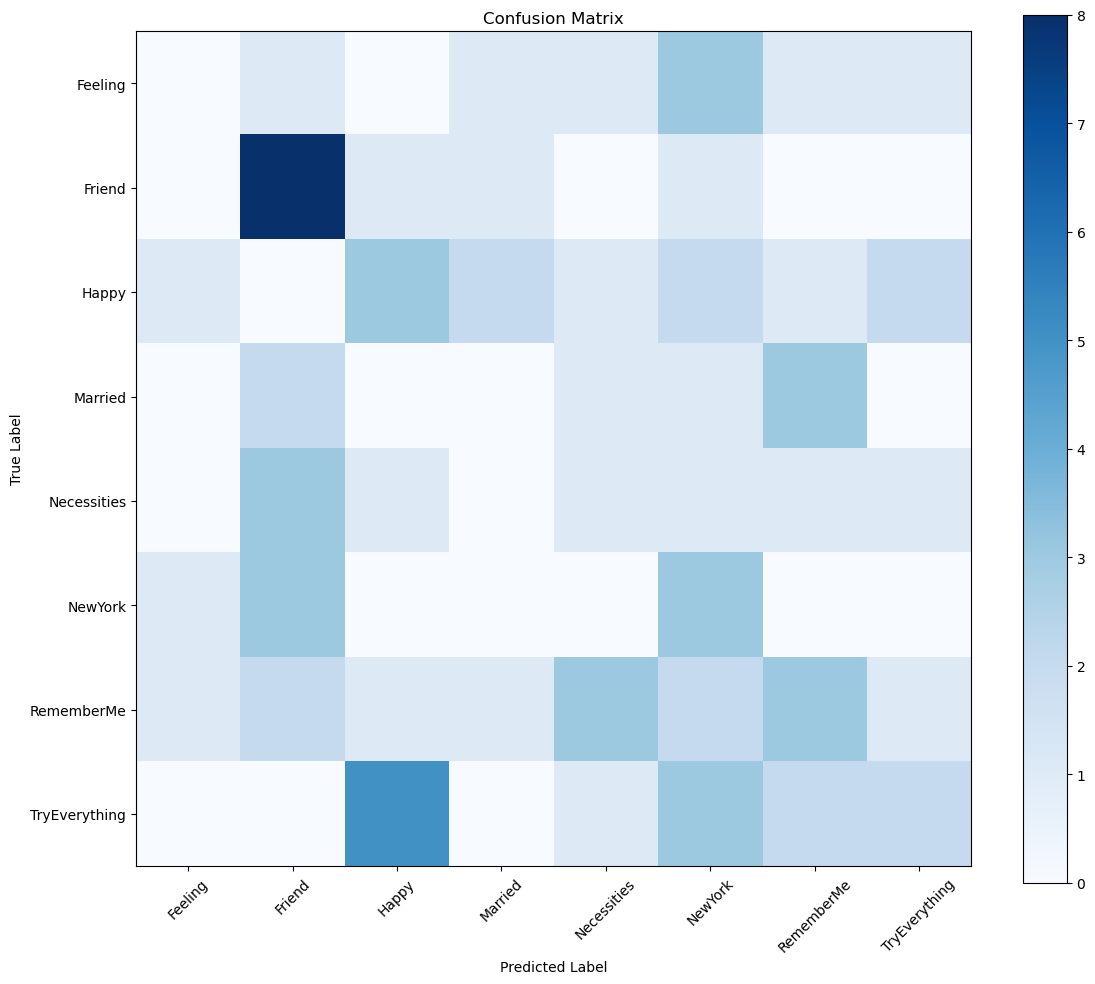

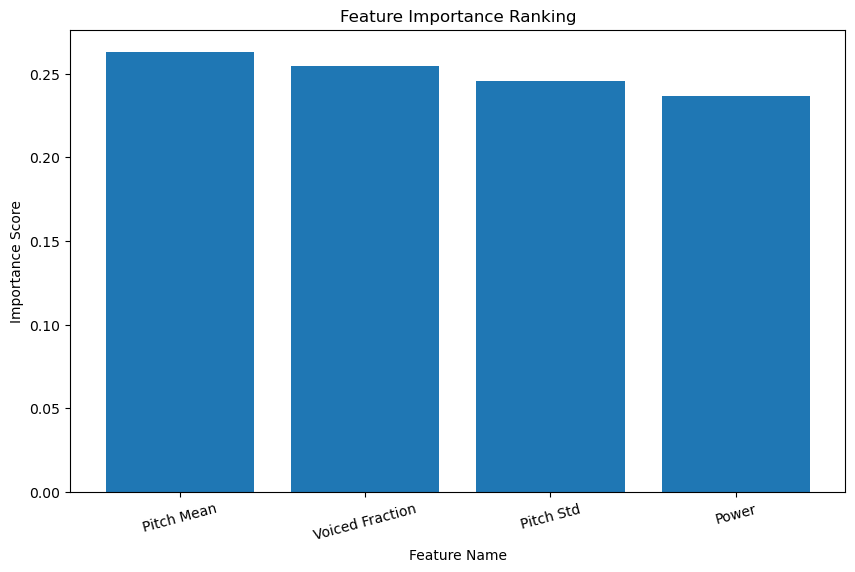


Feature importance ranking:
1. Pitch Mean: 0.2630
2. Voiced Fraction: 0.2543
3. Pitch Std: 0.2458
4. Power: 0.2369


In [8]:
# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
print("Model training completed!")

# Predict
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest set accuracy: {accuracy:.4f}")

# vision
cm = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)
plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# judgement the core difference
feature_names = ['Power', 'Pitch Mean', 'Pitch Std', 'Voiced Fraction']
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_idx])
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_idx], rotation=15)
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Feature Importance Ranking')
plt.show()

print("\nFeature importance ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {feature_names[idx]}: {importances[idx]:.4f}")

## 6.2 Experimental Results

### 6.2.1 Model Performance Summary

### 6.2.2 Key Observations 

# 7 Conclusions

Your conclusions, suggestions for improvements, etc should go here.

## 7.1 Summary
Overall, the task is finished  with 400-sample. I use the features of 'Power', 'Pitch Mean', 'Pitch Std', and 'Voiced Fraction' and the Random Forest model achieved ~70% accuracy on the 400-sample subset.

## 7.2 Limitations 
* The dataset used is relatively small
* Using many simple functions and methods, without further expanding on the content covered in class.

## 7.3 Improvement Suggestions (Consistent with Initial Recommendations)
* Trying to use another, larger dataset (my computer really can't handle it anymore)
* Add spectral features (e.g., spectral centroid) from the starter kit’s supplementary code (minimal extension).

# 8 References

Acknowledge others here (books, papers, repositories, libraries, tools)
* MLEnd_2025_Starter_kit
* Librosa Official Documentation (Pitch Extraction): https://librosa.org/doc/latest/generated/librosa.pyin.html
* Scikit-learn Random Forest Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html